# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [10]:
data = pd.read_csv('weight-height.csv')
print(data.groupby('Gender')[['Height', 'Weight']].mean())
print('\n')
print(data.groupby('Gender')[['Height', 'Weight']].std())

           Height      Weight
Gender                       
Female  63.708774  135.860093
Male    69.026346  187.020621


          Height     Weight
Gender                     
Female  2.696284  19.022468
Male    2.863362  19.781155


In [22]:
data[data['Gender'] == 'Male']

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [23]:
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [24]:
male_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [25]:
female_df.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

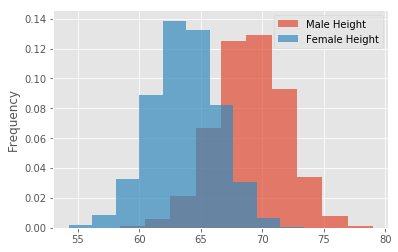

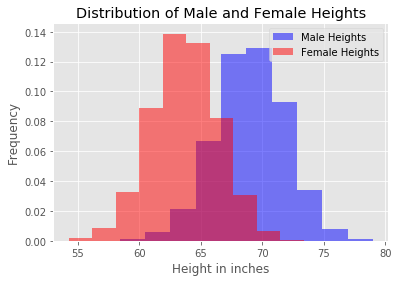

In [38]:
plt.hist(male_df['Height'], bins=10, alpha=.5, density=True, color='b', label='Male Heights')
plt.hist(female_df['Height'], bins=10, alpha=.5, density=True, color='r', label='Female Heights')
plt.xlabel("Height in inches")
plt.ylabel('Frequency')
plt.title('Distribution of Male and Female Heights')
plt.legend(loc='upper right')
plt.show()

In [40]:
# Record your observations - are these inline with your personal observations?
#
# It appears that the mean height of men is somewhere around 71 or so inches, while it's roughly 63 inches for women.
# This seems rather high based on my personal experience, but it could be due to some inherent bias in the dataset
# being used. Hard to know/tell

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

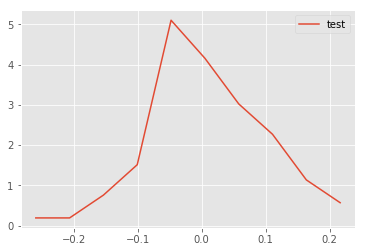

In [44]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

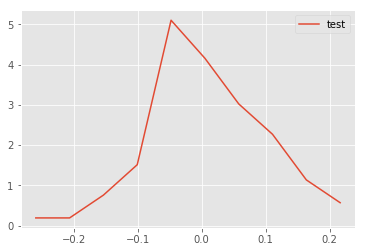

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

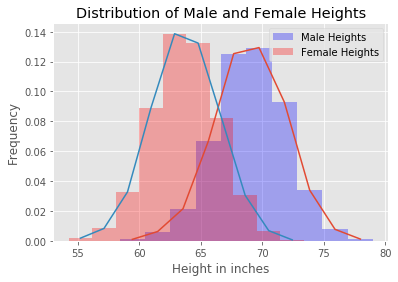

In [47]:
plt.hist(male_df['Height'], bins=10, alpha=.3, density=True, color='b', label='Male Heights')
plt.hist(female_df['Height'], bins=10, alpha=.3, density=True, color='r', label='Female Heights')
plt.xlabel("Height in inches")
plt.ylabel('Frequency')
plt.title('Distribution of Male and Female Heights')
plt.legend(loc='upper right')
x,y = density(male_df.Height)
plt.plot(x,y)
a,b = density(female_df.Height)
plt.plot(a,b)
plt.show()



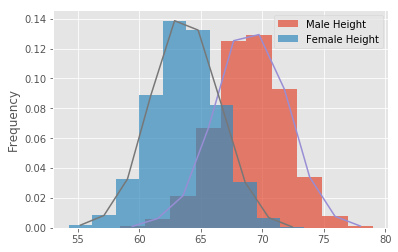

#### Repeat above exerice for male and female weights

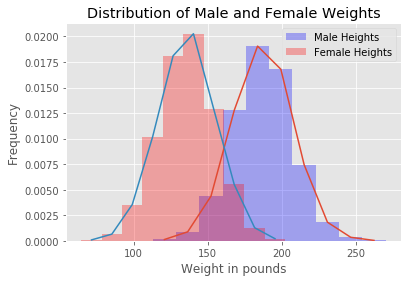

In [48]:
# Your code here

plt.hist(male_df['Weight'], bins=10, alpha=.3, density=True, color='b', label='Male Heights')
plt.hist(female_df['Weight'], bins=10, alpha=.3, density=True, color='r', label='Female Heights')
plt.xlabel("Weight in pounds")
plt.ylabel('Frequency')
plt.title('Distribution of Male and Female Weights')
plt.legend(loc='upper right')
x,y = density(male_df['Weight'])
plt.plot(x,y)
a,b = density(female_df['Weight'])
plt.plot(a,b)
plt.show()

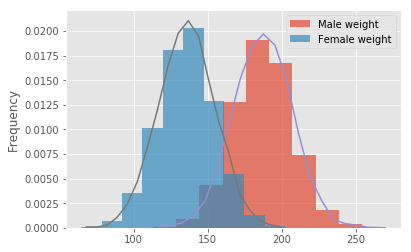

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
# These results tend to be in line with my personal experiences.


# So whats the takeaway when comparing male and female heights and weights 
# Men are generally heavier and taller on average.



#### Repeat Above experiments in seaborn and compare with your results. 

Text(0.5,1,'Comparing weights')

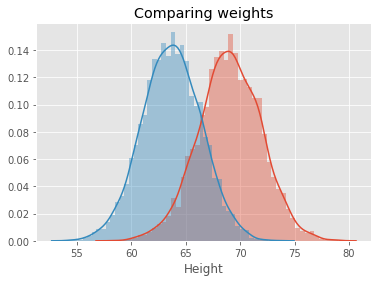

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Comparing Heights')

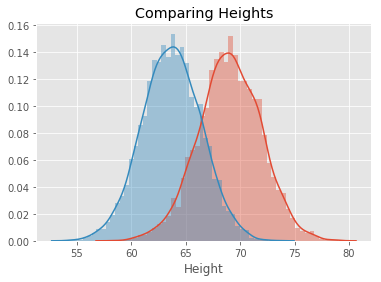

In [51]:
import seaborn as sns

sns.distplot(male_df['Height'])
sns.distplot(female_df['Height'])
plt.title('Comparing Heights')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Comparing Weights')

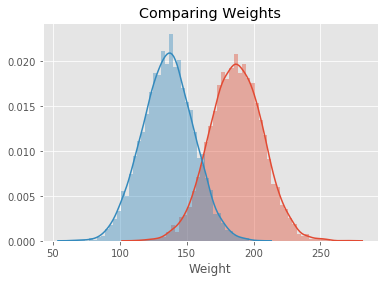

In [52]:
sns.distplot(male_df['Weight'])
sns.distplot(female_df['Weight'])
plt.title('Comparing Weights')

In [53]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

# Seaborn uses more bins to show the distribution of heights and weights within this data set. As such, the
# results appear much smoother and give a little more detail on the breakdowns/frequency of male/female heights
# and weights


## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.

In [ ]:
# Finished January 23, 2019